<a href="https://colab.research.google.com/github/programeralebrije/MachineLearningNYtaxi/blob/main/new_york_taxi_fare_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('new-york-taxi-fare-predictions')
jovian.set_colab_id('102pCN3oVvDHoazudeUcVW7bzSg5LR3Zp')

# New York Taxi Fare Predictions 

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="new-york-taxi-fare-predictions")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/programeralebrije/new-york-taxi-fare-predictions


'https://jovian.ai/programeralebrije/new-york-taxi-fare-predictions'

### Outline of the project
1. Downlaod the dataset
2. Explore and analyze the dataset
3. Prepare the dataset for ML training 
4. Train Hardcoded and baseline models 
5. Make predictions and submit to Kaggle
6. Perform feature engeneering 
7. Train and evaluate different models 
8. Tune Hyperparameters for the best models 
9. Train on a GPU with the entire dataset 
10. Document and publish the project online 

# 1. Downlad the dataset 

Steps:
- Install required libraries
- Download data from Kaggle
- View dataset files 
- Load trianing set with Pandas
- Load test set with Pandas

# Install required libraries

In [ ]:
!pip install jovian opendatasets pandas numpy scikit-learn xgboost --quiet

In [ ]:
import jovian 

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/programeralebrije/new-york-taxi-fare-predictions


'https://jovian.ai/programeralebrije/new-york-taxi-fare-predictions'

# Download data from Kaggle 

In [ ]:
import opendatasets as od

In [ ]:
dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction'

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rubenlarrazolo
Your Kaggle Key: ··········


100%|██████████| 1.56G/1.56G [00:12<00:00, 130MB/s]



Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction


In [ ]:
data_dir = './new-york-city-taxi-fare-prediction'

##View Dataset Files

In [ ]:
# List of files with size
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 root root  486 Jan 25 18:43 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Jan 25 18:43 sample_submission.csv
-rw-r--r-- 1 root root 960K Jan 25 18:43 test.csv
-rw-r--r-- 1 root root 5.4G Jan 25 18:46 train.csv


In [ ]:
!wc -1 {data_dir}/train.csv

wc: invalid option -- '1'
Try 'wc --help' for more information.


In [ ]:
# Training set
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [ ]:
# Test set
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

Test Data Set is missing Fare amout, this set is not be use for predictions .

In [ ]:
# Sample submission file
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


In [ ]:
# No. of lines in training set
!wc -l {data_dir}/train.csv

55423856 ./new-york-city-taxi-fare-prediction/train.csv


In [ ]:
# No. of lines in test set
!wc -l {data_dir}/test.csv

9914 ./new-york-city-taxi-fare-prediction/test.csv


In [ ]:
# No. of lines in submission file
!wc -l {data_dir}/sample_submission.csv

9915 ./new-york-city-taxi-fare-prediction/sample_submission.csv


**# No. of lines in training set**

In [ ]:
!wc -l {data_dir}/train.csv

55423856 ./new-york-city-taxi-fare-prediction/train.csv


**# No. of lines in submission file**

In [ ]:
!wc -l {data_dir}/test.csv

9914 ./new-york-city-taxi-fare-prediction/test.csv


**# No. of lines in test set**

In [ ]:
!wc -l {data_dir}/test.csv

9914 ./new-york-city-taxi-fare-prediction/test.csv


Observations:

* This is a supervised learning 
regression problem
* Training data is 5.5 GB in size
* Training data has 5.5 million rows
* Test set is much smaller (< 10,000 rows)
* The training set has 8 columns:
   * key (a unique identifier)
   * fare_amount (target column)
   * pickup_datetime
   * pickup_longitude
   * pickup_latitude
   * dropoff_longitude
   * dropoff_latitude
   * passenger_count
* The test set has all columns except the target column fare_amount.
* The submission file should contain the key and fare_amount for each test sample.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/programeralebrije/new-york-taxi-fare-predictions


'https://jovian.ai/programeralebrije/new-york-taxi-fare-predictions'

##  1.- Loading Training Set

Loading the entire dataset into Pandas is going to be slow, so we can use the following optimizations:

 * Ignore the key column
 * Parse pickup datetime while loading data
 * Specify data types for other columns
   * float32 for geo coordinates
   * float32 for fare amount
   * uint8 for passenger count
* Work with a 1% sample of the data (~500k rows)
We can apply these optimizations while using pd.read_csv

In [ ]:
import pandas as pd
import random

In [ ]:
sample_frac = 0.03

In [ ]:
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'passenger_count': 'float32'
}

In [ ]:
selected_cols

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [ ]:
import random

In [ ]:
random.random(
    
)

0.9087736271740057

In [ ]:

dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'passenger_count': 'float32'
}

def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac

random.seed(42)
df = pd.read_csv(data_dir+"/train.csv", 
                 usecols=selected_cols, 
                 dtype=dtypes, 
                 parse_dates=['pickup_datetime'], 
                 skiprows=skip_row)

CPU times: user 5min 19s, sys: 1.04 s, total: 5min 19s
Wall time: 5min 19s

In [ ]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,16.9,2010-01-05 16:52:16+00:00,-74.016045,40.711304,-73.979271,40.782004,1.0
1,8.9,2009-09-02 01:11:00+00:00,-73.980659,40.733871,-73.991539,40.758138,2.0
2,4.1,2009-11-06 01:04:03+00:00,-73.991600,40.744713,-73.983078,40.744682,2.0
3,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755481,1.0
4,10.0,2014-11-12 12:40:29+00:00,-74.002579,40.739571,-73.994583,40.760682,1.0
...,...,...,...,...,...,...,...
1661726,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756217,1.0
1661727,7.5,2013-03-02 03:13:05+00:00,-74.002953,40.728493,-73.985329,40.726105,1.0
1661728,6.0,2014-10-18 07:51:00+00:00,-73.997681,40.724380,-73.994148,40.717797,1.0
1661729,8.0,2013-12-21 14:03:00+00:00,-73.976486,40.765919,-73.991524,40.759857,6.0


In [ ]:
test_df = pd.read_csv(data_dir+'/test.csv', dtype=dtypes, parse_dates=['pickup_datetime'])

In [ ]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1.0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1.0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746139,1.0
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751635,1.0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6.0


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/programeralebrije/new-york-taxi-fare-predictions


'https://jovian.ai/programeralebrije/new-york-taxi-fare-predictions'

## 2.- Explore the Dataset

* Basic info about training set
* Basic info about test set
* Exploratory data analysis & visualization
* Ask & answer questions

## Training Set


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1661731 entries, 0 to 1661730
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype              
---  ------             --------------    -----              
 0   fare_amount        1661731 non-null  float32            
 1   pickup_datetime    1661731 non-null  datetime64[ns, UTC]
 2   pickup_longitude   1661731 non-null  float32            
 3   pickup_latitude    1661731 non-null  float32            
 4   dropoff_longitude  1661717 non-null  float32            
 5   dropoff_latitude   1661717 non-null  float64            
 6   passenger_count    1661731 non-null  float32            
dtypes: datetime64[ns, UTC](1), float32(5), float64(1)
memory usage: 57.1 MB


In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.661731e+06,1.661731e+06,1.661731e+06,1.661717e+06,1.661717e+06,1.661731e+06
mean,1.134016e+01,-7.126932e+01,3.940133e+01,-7.126912e+01,3.991955e+01,1.685489e+00
std,9.830639e+00,1.274979e+01,1.048062e+01,1.297621e+01,1.029647e+01,1.334168e+00
min,-3.000000e+02,-3.439245e+03,-3.474112e+03,-3.367929e+03,-3.474112e+03,0.000000e+00
25%,6.000000e+00,-7.399203e+01,4.073491e+01,-7.399140e+01,4.073399e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075266e+01,-7.398017e+01,4.075313e+01,1.000000e+00
75%,1.250000e+01,-7.396710e+01,4.076711e+01,-7.396368e+01,4.076806e+01,2.000000e+00
max,1.097480e+03,3.442185e+03,3.347260e+03,3.442185e+03,3.351403e+03,2.080000e+02


In [ ]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

Observations about training data:

- 1,661,731 rows, as expected
- No missing data (in the sample)
- `fare_amount` ranges from \$-300.0 to \$1097.0 
- `passenger_count` ranges from 0 to 208 
- Dates range from 1st Jan 2009 to 30th June 2015
- The dataset takes up ~57 MB of space in the RAM

We may need to deal with outliers and data entry errors before we train our model.

# Test Set

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   float32            
dtypes: datetime64[ns, UTC](1), float32(4), float64(1), object(1)
memory usage: 387.4+ KB


In [ ]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.976181,40.750954,-73.974945,40.751743,1.671273
std,0.042799,0.033542,0.039093,0.035435,1.278756
min,-74.252190,40.573143,-74.263245,40.568973,1.000000
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696683,6.000000


In [ ]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

Some observations about the test set:

- 9914 rows of data
- No missing values
- No obvious data entry errors
- 1 to 6 passengers (we can limit training data to this range)
- Latitudes lie between 40 and 42
- Longitudes lie between -75 and -72
- Pickup dates range from Jan 1st 2009 to Jun  30th 2015 (same as training set)

We can use the ranges of the test set to drop outliers/invalid data from the training set.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/programeralebrije/new-york-taxi-fare-predictions


'https://jovian.ai/programeralebrije/new-york-taxi-fare-predictions'

### Exploratory Data Analysis and Visualization




### Ask & Answer Questions


1. What is the busiest day of the week?
2. What is the busiest time of the day?
3. In which month are fares the highest?
4. Which pickup locations have the highest fares?
5. Which drop locations have the highest fares?
6. What is the average ride distance?

EDA + asking questions will help you develop a deeper understand of the data and give you ideas for feature engineering.

In [ ]:
import seaborn as sns

In [ ]:
sns.set_style("darkgrid")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


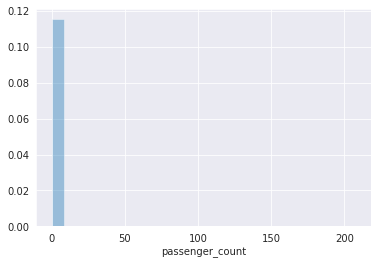

In [ ]:
sns.distplot(df.passenger_count, bins=24, kde=False, norm_hist=True)

In [ ]:
sample_df = df.sample(int(0.1 * len(df)))

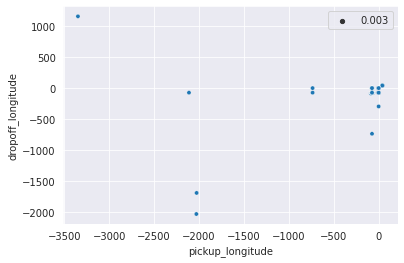

In [ ]:
sns.scatterplot(x=sample_df.pickup_longitude, y=sample_df.dropoff_longitude, size=0.003)

In [ ]:
import folium

In [ ]:
lat_pick, lon_pick, lat_dro, lon_pick = df.pickup_latitude, df.pickup_longitude[0], df.dropoff_latitude[0], df.dropoff_longitude[0], 
lat_pick, lon_pick, lat_dro, lon_pick,

(0          40.711304
 1          40.733871
 2          40.744713
 3          40.751904
 4          40.739571
              ...    
 1661726    40.706635
 1661727    40.728493
 1661728    40.724380
 1661729    40.765919
 1661730    40.787758
 Name: pickup_latitude, Length: 1661731, dtype: float32,
 -73.97927,
 40.782004,
 -73.97927)

In [ ]:
for x in df[['pickup_longitude', 'dropoff_latitude', 'pickup_latitude', 'dropoff_longitude']].sample(100).iteritems():
    print(x[1])

144848    -73.990517
1209850   -73.971268
117015    -73.973839
793987    -73.982101
1206357   -74.005783
             ...    
489703    -73.982376
1223095   -73.951897
777048    -73.939247
1357248   -73.982048
77304     -73.994392
Name: pickup_longitude, Length: 100, dtype: float32
144848     40.717697
1209850    40.772294
117015     40.787798
793987     40.779219
1206357    40.728307
             ...    
489703     40.758532
1223095    40.758824
777048     40.805848
1357248    40.787070
77304      40.747262
Name: dropoff_latitude, Length: 100, dtype: float64
144848     40.755844
1209850    40.755371
117015     40.791981
793987     40.772099
1206357    40.726246
             ...    
489703     40.745708
1223095    40.769630
777048     40.804951
1357248    40.772488
77304      40.745838
Name: pickup_latitude, Length: 100, dtype: float32
144848    -73.978119
1209850   -73.955780
117015    -73.967628
793987    -73.981453
1206357   -73.994156
             ...    
489703    -73.992996
12230

In [ ]:
zip(list(df.pickup_longitude), list(df.dropoff_latitude), list(df.pickup_latitude), list(df.dropoff_longitude))

In [ ]:
from folium.plugins import HeatMap

In [ ]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(df.pickup_longitude), list(df.dropoff_latitude), list(df.pickup_latitude), list(df.dropoff_longitude)))

In [ ]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/programeralebrije/new-york-taxi-fare-predictions


'https://jovian.ai/programeralebrije/new-york-taxi-fare-predictions'

## 3. Prepare Dataset for Training

- Split Training & Validation Set
- Fill/Remove Missing Values
- Extract Inputs & Outputs
   - Training
   - Validation
   - Test

### Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data. 

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
len(train_df), len(val_df)

(1329384, 332347)

### Fill/Remove Missing Values

There are no missing values in our sample, but if there were, we could simply drop the rows with missing values instead of trying to fill them (since we have a lot of training data)>

In [ ]:
train_df = train_df.dropna()
val_df = val_df.dropna()

### Extract Inputs and Outputs

In [ ]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
input_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [ ]:
target_col = 'fare_amount'

#### Training

In [ ]:
train_inputs = train_df[input_cols]


In [ ]:
train_targets = train_df[target_col]

In [ ]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1344710,-73.986603,40.777008,-73.983513,40.762397,2.0
881046,-73.982513,40.775196,-73.985092,40.769452,5.0
484486,-73.988365,40.737541,-73.990646,40.756027,1.0
560794,-73.991158,40.749142,-73.982712,40.756865,1.0
1422663,-73.980354,40.780384,-73.955025,40.800145,1.0
...,...,...,...,...,...
259178,-73.962624,40.763153,-73.973259,40.750961,1.0
1414414,-73.985069,40.758743,-73.990257,40.754697,1.0
131932,-73.983635,40.738041,-73.969292,40.768489,3.0
671155,-73.966866,40.756706,-73.980789,40.749471,1.0


In [ ]:
train_targets

1344710     7.000000
881046      4.500000
484486      6.500000
560794     25.299999
1422663     7.300000
             ...    
259178      6.500000
1414414    40.500000
131932      7.700000
671155      8.500000
121958      9.500000
Name: fare_amount, Length: 1329371, dtype: float32

#### Validation

In [ ]:
val_inputs = val_df[input_cols]

In [ ]:
val_targets = val_df[target_col]

In [ ]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1030404,-73.965759,40.773941,-73.955383,40.775158,2.0
799486,-73.947441,40.783585,-73.969872,40.756139,1.0
951362,-73.975182,40.733097,-73.994156,40.686237,1.0
175104,-73.989113,40.748135,-73.989113,40.748135,1.0
1241223,-73.921646,40.767036,-73.914055,40.759014,1.0
...,...,...,...,...,...
1404707,-73.977676,40.746468,-73.962479,40.766637,1.0
14648,-73.977531,40.758072,-73.951759,40.769729,1.0
1635888,-73.956017,40.785038,-73.964355,40.768023,1.0
683077,-73.789238,40.646133,-73.970551,40.756647,5.0


In [ ]:
val_targets

1030404     4.100000
799486     11.500000
951362     14.900000
175104      3.500000
1241223     5.000000
             ...    
1404707     6.500000
14648      10.000000
1635888     6.500000
683077     56.799999
1377148     6.900000
Name: fare_amount, Length: 332346, dtype: float32